In [53]:
# Import libraries
import math
import pandas_datareader as web
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import timedelta
plt.style.use('fivethirtyeight')

In [ ]:
#Testing changes in git
print("Print something before everything")

In [2]:
# Pull some PANI stock data from yahoo
df = yf.download('PANI.JK', start='2021-01-01', end='2025-03-19')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
df.columns = df.columns.get_level_values(0)

In [4]:
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2021-01-04,8.237999,8.237999,8.166982,8.166982,731913
2021-01-05,8.095964,8.237998,8.095964,8.237998,95711
2021-01-06,8.095964,8.095964,7.953930,8.095964,1013419
2021-01-07,8.024947,8.024947,8.024947,8.024947,2815053
2021-01-08,7.953931,8.309017,7.953931,8.024947,3622974
...,...,...,...,...,...
2025-03-12,10925.000000,11300.000000,10925.000000,11200.000000,3564100
2025-03-13,10850.000000,11100.000000,10775.000000,10925.000000,3608900
2025-03-14,10400.000000,10975.000000,10350.000000,10900.000000,5080200


In [5]:
df[~df['Close'].isnull()]

Price,Close,High,Low,Open,Volume
Date,,,,,
2021-01-04,8.237999,8.237999,8.166982,8.166982,731913
2021-01-05,8.095964,8.237998,8.095964,8.237998,95711
2021-01-06,8.095964,8.095964,7.953930,8.095964,1013419
2021-01-07,8.024947,8.024947,8.024947,8.024947,2815053
2021-01-08,7.953931,8.309017,7.953931,8.024947,3622974
...,...,...,...,...,...
2025-03-12,10925.000000,11300.000000,10925.000000,11200.000000,3564100
2025-03-13,10850.000000,11100.000000,10775.000000,10925.000000,3608900
2025-03-14,10400.000000,10975.000000,10350.000000,10900.000000,5080200


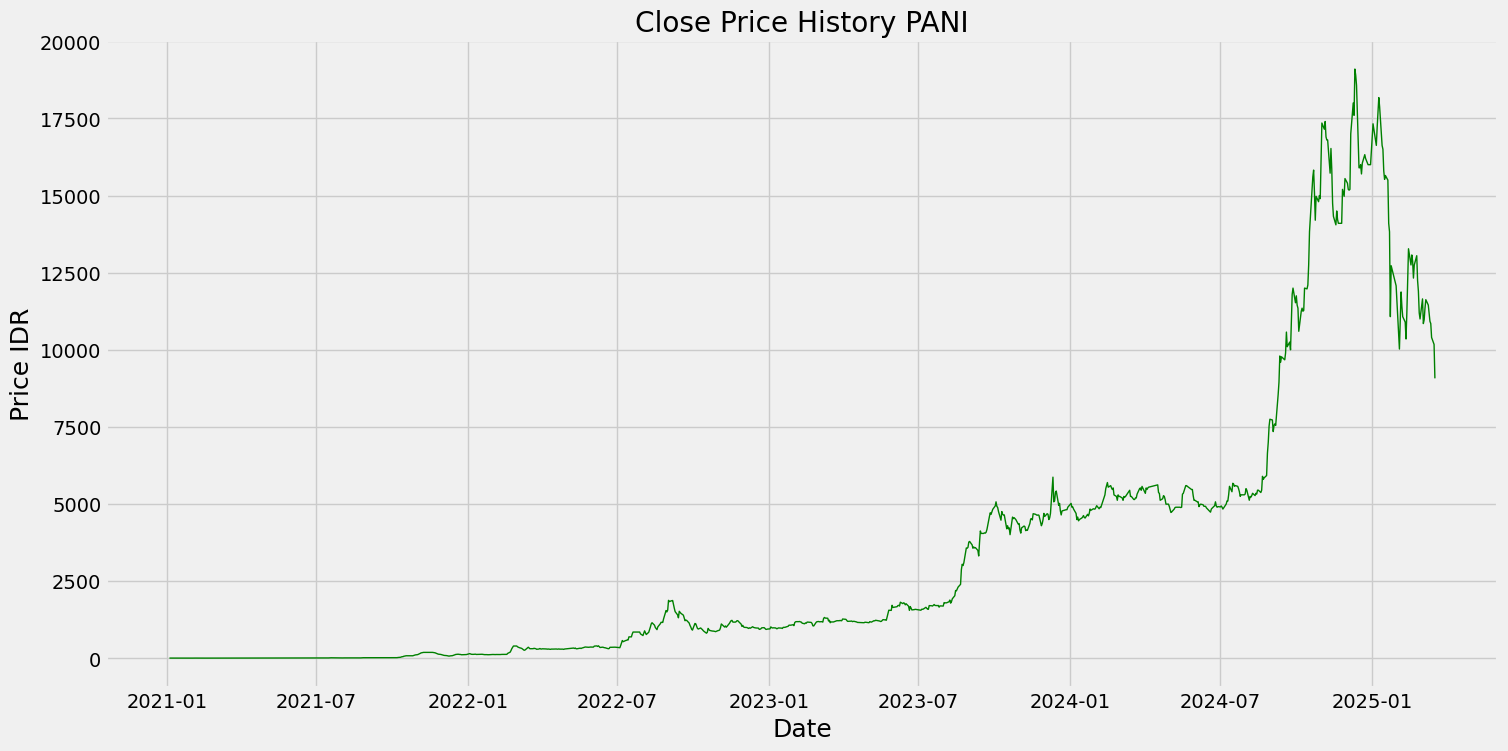

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History PANI')
plt.plot(df['Close'], linewidth=1, color='green')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price IDR',fontsize=18)
plt.show()

In [7]:
#Pull closing data only 
data = df.filter(['Close'])
#Series to numpy array
dataset = data.values

#get length of data training rows
training_data_len = math.ceil(len(dataset)*.8)

In [8]:
#Scaling using minmax - make dataset value ranging between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[6.32323102e-05],
       [5.57932090e-05],
       [5.57932090e-05],
       ...,
       [5.44334888e-01],
       [5.32550445e-01],
       [4.74937615e-01]])

In [9]:
#Creating traning dataset
train_data = scaled_data[0:training_data_len, :]
#Splitting
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([6.32323102e-05, 5.57932090e-05, 5.57932090e-05, 5.20736584e-05,
       4.83541578e-05, 4.83541578e-05, 5.20736584e-05, 5.57932090e-05,
       5.57932090e-05, 6.32323102e-05, 5.57932090e-05, 7.06714114e-05,
       6.69519107e-05, 4.83541578e-05, 2.23173286e-05, 2.60368292e-05,
       2.60368292e-05, 4.09150566e-05, 3.34759054e-05, 2.60368292e-05,
       1.85977530e-05, 9.29887649e-05, 7.06714114e-05, 7.43910119e-05,
       5.95128095e-05, 5.20736584e-05, 5.20736584e-05, 4.09150566e-05,
       4.46345822e-05, 3.71955060e-05, 1.85977530e-05, 7.81105625e-05,
       4.83541578e-05, 2.23173286e-05, 2.60368292e-05, 2.60368292e-05,
       2.60368292e-05, 2.97564048e-05, 2.60368292e-05, 1.85977530e-05,
       1.85977530e-05, 1.85977530e-05, 4.83541578e-05, 2.60368292e-05,
       2.23173286e-05, 2.23173286e-05, 2.60368292e-05, 2.23173286e-05,
       2.60368292e-05, 0.00000000e+00, 1.85977530e-05, 2.60368292e-05,
       3.34759054e-05, 2.23173286e-05, 1.48781774e-05, 7.81105625e-05,
     

In [10]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(x_train)

In [11]:
#Reshaping data for LSTM input, they only accept 3 dimensions
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape          

(756, 60, 1)

In [12]:
#Builing LSTM models
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [13]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#Training the model
model.fit(x_train,y_train,batch_size=1, epochs=1)

756/756 [==============================] - 22s 25ms/step - loss: 6.6169e-04


In [21]:
#Creating test dataset
test_data = scaled_data[training_data_len-60: , :]
#Splitting
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [23]:
#Convert data to array
x_test = np.array(x_test)

In [25]:
#Reshape
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))

In [29]:
#Predict the test
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 0s 17ms/step


In [39]:
#Evaluate w/ RMSE (Root mean squared error) - the lower the value, the better
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
rmse

1627.5492394187447

/var/folders/xp/wrxjc_mx7c7307_vvh_k_sv80000gn/T/ipykernel_718/321368654.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


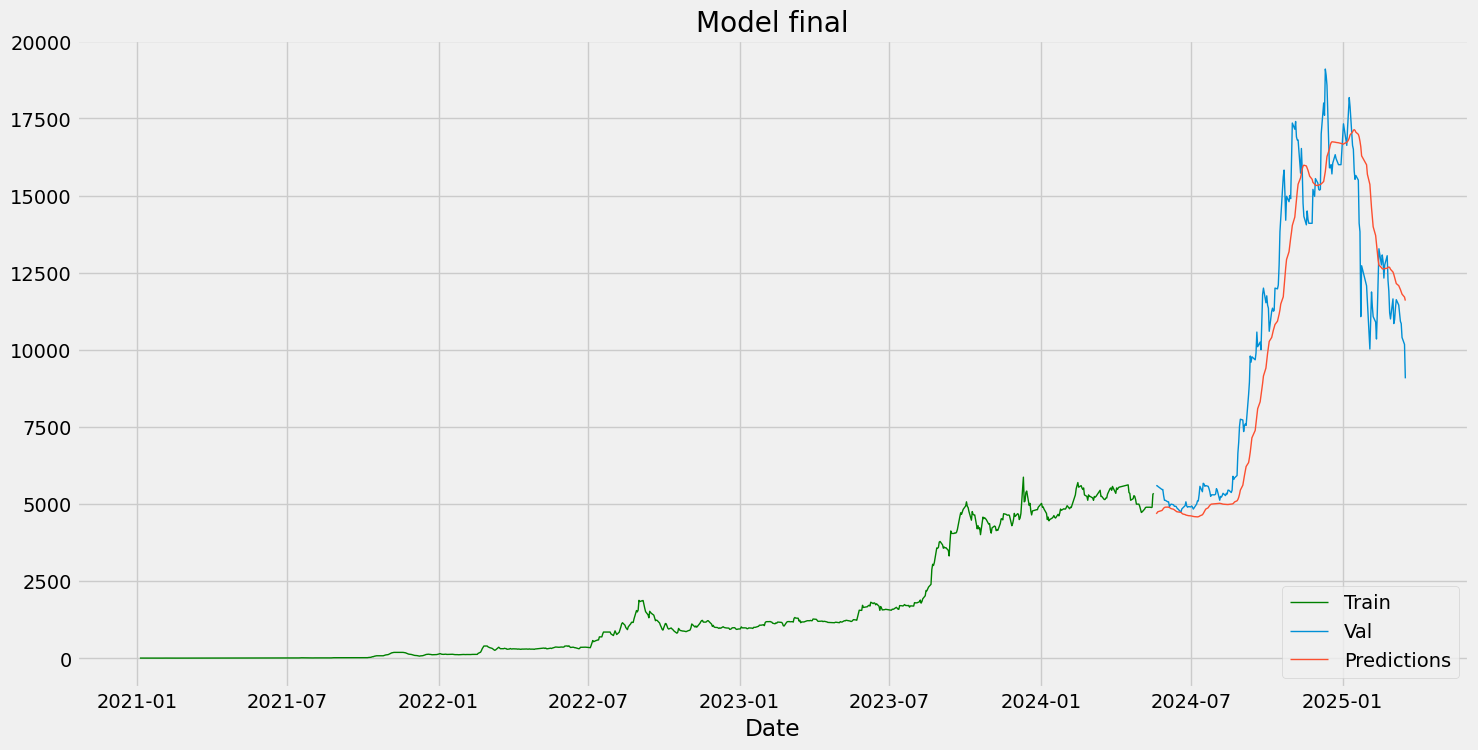

In [47]:
#Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualizate the model

plt.figure(figsize=(16,8))
plt.title('Model final')
plt.xlabel('Date')
plt.plot(train['Close'],linewidth=1, color='green')
plt.plot(valid[['Close', 'Predictions']], linewidth=1)
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()



In [48]:
valid

,Close,Predictions
Date,,
2024-05-20,5597.686035,4685.719727
2024-05-21,5597.686035,4714.039062
2024-05-22,5572.696289,4751.566895
2024-05-27,5472.737305,4792.526855
2024-05-28,5472.737305,4830.365234
...,...,...
2025-03-12,10925.000000,11955.117188
2025-03-13,10850.000000,11882.613281
2025-03-14,10400.000000,11804.492188


In [71]:
#Prepare last 60 days input
last_60_days = scaled_data[-60:]
current_input = last_60_days.reshape(1, 60, 1)

In [72]:
#Predict next 60 days
future_preds = []
for _ in range(60):
    pred = model.predict(current_input)[0,0]
    future_preds.append(pred)
    current_input = np.append(current_input[:,1:,:], [[[pred]]], axis=1)

1/1 [==============================] - 0s 23ms/step


In [73]:
#Inverse scale the predictions
future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))


In [74]:
#Create future dates
last_date = data.index[-1]
future_dates = pd.date_range(last_date + timedelta(days=1), periods=60)

In [75]:
#Create future DataFrame
future_df = pd.DataFrame(data=future_preds, index=future_dates, columns=['Predicted Price'])

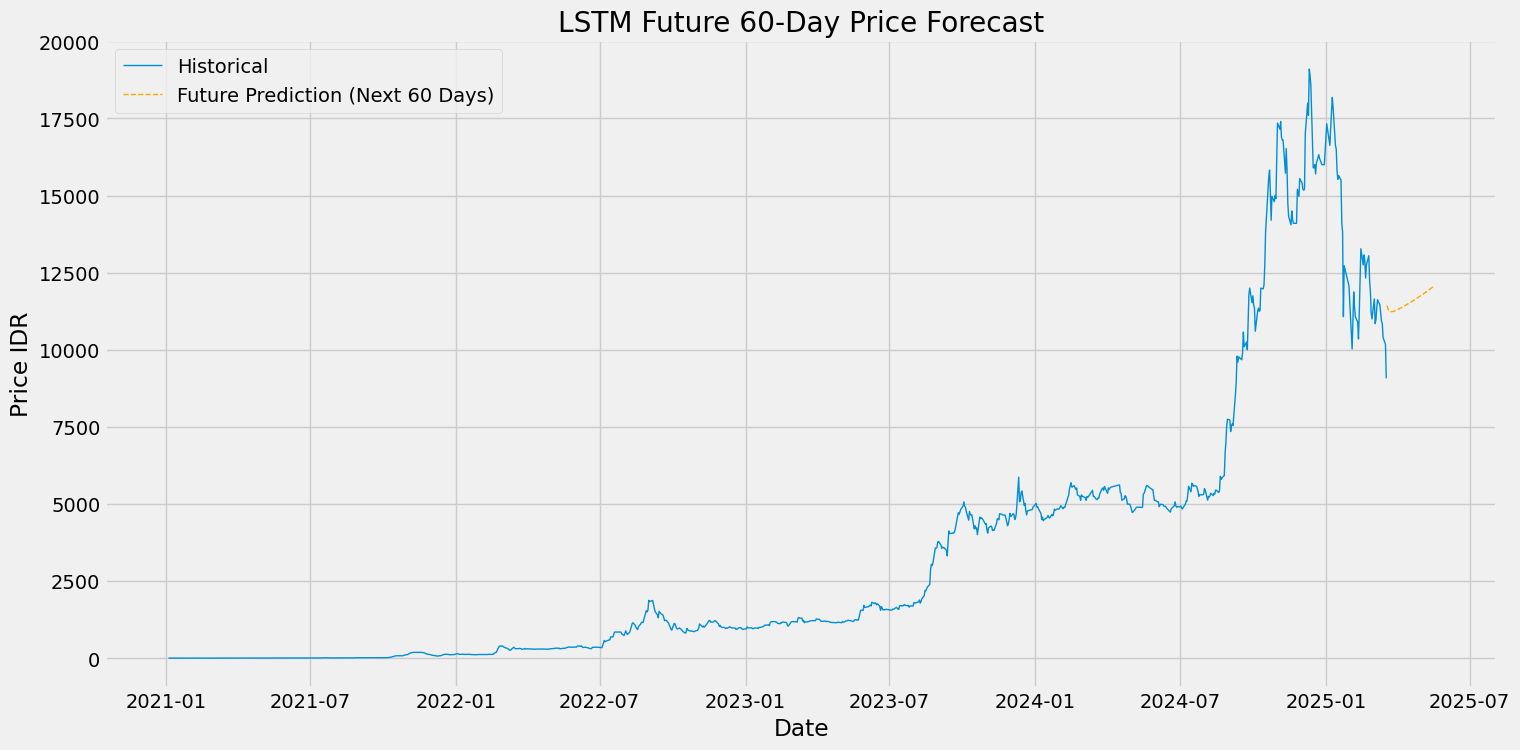

In [76]:
#Plot actual + predicted
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Historical', linewidth=1)
plt.plot(future_df['Predicted Price'], label='Future Prediction (Next 60 Days)', linewidth=1, linestyle='--', color='orange')
plt.title('LSTM Future 60-Day Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price IDR')
plt.legend(loc='upper left')
plt.show()

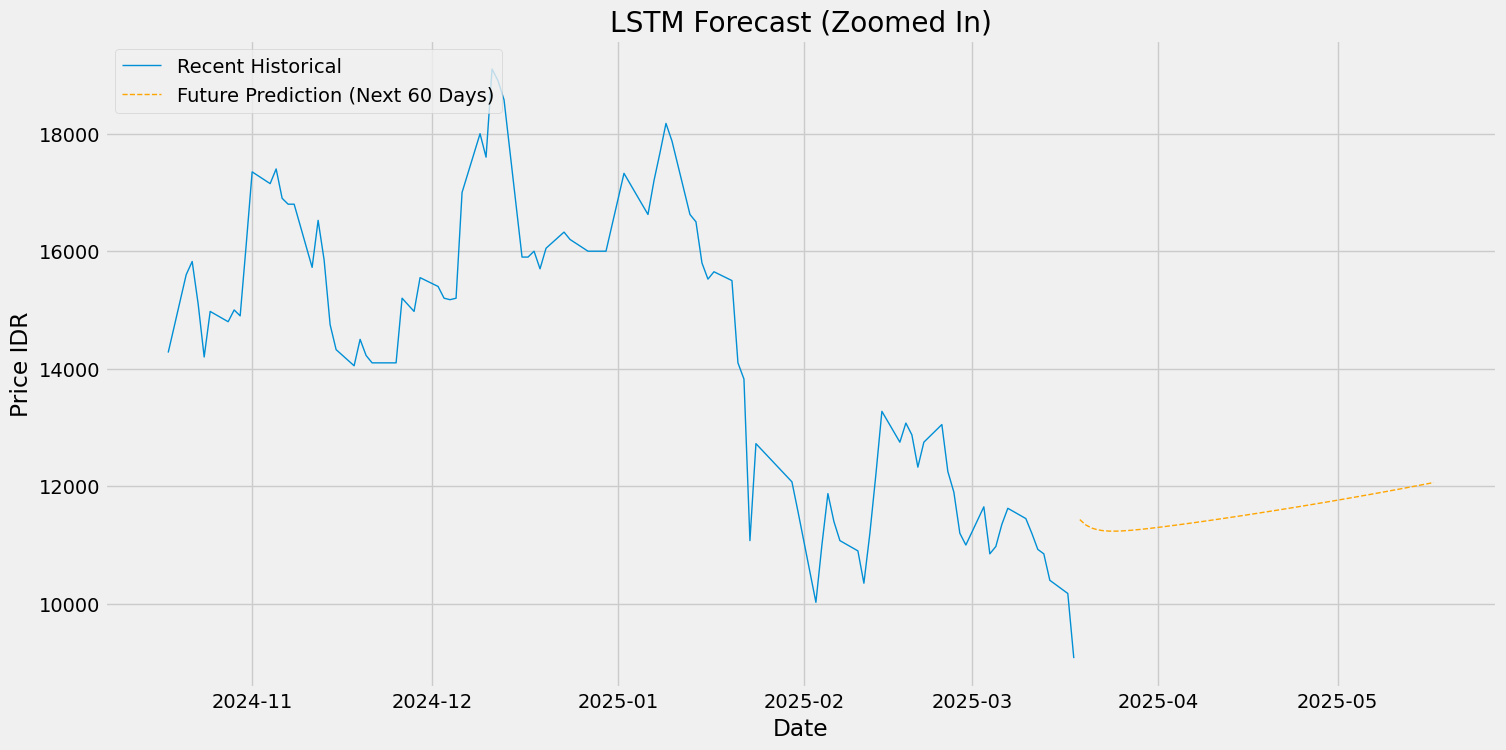

In [77]:
#Make zoom version
plt.figure(figsize=(16,8))

# Zoom in on last 100 actual days
zoomed_actual = data['Close'][-100:]

# Plot last 100 actual days
plt.plot(zoomed_actual.index, zoomed_actual.values, label='Recent Historical', linewidth=1)

# Plot future predictions
plt.plot(future_df.index, future_df['Predicted Price'], label='Future Prediction (Next 60 Days)', linewidth=1, linestyle='--', color='orange')

plt.title('LSTM Forecast (Zoomed In)')
plt.xlabel('Date')
plt.ylabel('Price IDR')
plt.legend(loc='upper left')
plt.show()